<a href="https://colab.research.google.com/github/Sciederrick/Data-Science-For-EveryOne/blob/main/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
pd.options.display.float_format = "{:.1f}".format

In [16]:
# https://drive.google.com/file/d/1_lRNPaqpDCxxFo1QyNG6lcbtSlM9c-3f/view?usp=sharing
# file_id='1_lRNPaqpDCxxFo1QyNG6lcbtSlM9c-3f'
# g_drive_url = 'https://drive.google.com/uc?id={}'.format("1_lRNPaqpDCxxFo1QyNG6lcbtSlM9c-3f")
df = pd.read_csv('/content/craigslist_vehicles.csv', engine='python', on_bad_lines='warn')
df.head()

Skipping line 2981: unexpected end of data


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.4,-99.9,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.4,-99.9,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.5,-99.8,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.4,-99.9,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.4,-99.9,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


In [17]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979 entries, 0 to 2978
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2979 non-null   int64  
 1   id            2979 non-null   int64  
 2   url           2979 non-null   object 
 3   region        2979 non-null   object 
 4   region_url    2979 non-null   object 
 5   price         2979 non-null   int64  
 6   year          2977 non-null   float64
 7   manufacturer  2904 non-null   object 
 8   model         2936 non-null   object 
 9   condition     1637 non-null   object 
 10  cylinders     1429 non-null   object 
 11  fuel          2974 non-null   object 
 12  odometer      2978 non-null   float64
 13  title_status  2958 non-null   object 
 14  transmission  2969 non-null   object 
 15  VIN           2007 non-null   object 
 16  drive         1887 non-null   object 
 17  size          654 non-null    object 
 18  type          2334 non-null 

In [18]:
df.shape

(2979, 28)

In [19]:
# @title Address data format
df = df.convert_dtypes() # convert to best possible types

df.dtypes

Unnamed: 0        Int64
id                Int64
url              string
region           string
region_url       string
price             Int64
year              Int64
manufacturer     string
model            string
condition        string
cylinders        string
fuel             string
odometer          Int64
title_status     string
transmission     string
VIN              string
drive            string
size             string
type             string
paint_color      string
image_url        string
description      string
county            Int64
state            string
lat             Float64
long            Float64
posting_date     string
removal_date     string
dtype: object

In [20]:
# Manually convert columns
df['price'] = df['price'].apply(float)
df['year'] = pd.to_datetime(df['year'], format='%Y')
# # condition => [<NA>, 'excellent', 'good', 'like new', 'fair', 'new', 'salvage']
# df['condition'].astype('category')
# # cylinders => [  <NA>,  '4 cylinders',  '6 cylinders',  '8 cylinders',
# #   'other',  '5 cylinders', '10 cylinders',  '3 cylinders',
# #   '12 cylinders'
# # ]
# df['cylinders'].astype('category')
# # fuel => ['gas', 'diesel', 'other', 'hybrid', <NA>, 'electric']
# df['fuel'].astype('category')
# # title_status => ['clean', 'missing', 'lien', 'rebuilt', 'salvage', <NA>, 'parts only']
# df['fuel'].astype('category')
# # transmission => ['automatic', 'other', 'manual', <NA>]
# df['transmission'].astype('category')
# # drive => [<NA>, 'fwd', '4wd', 'rwd']
# df['drive'].astype('category')
# # size => [<NA>, 'full-size', 'sub-compact', 'compact', 'mid-size']
# df['size'].astype('category')
# # type => [         <NA>,       'sedan',         'SUV',    'mini-van',      'pickup',
# #  'truck',       'coupe',   'hatchback', 'convertible',       'other',
# #  'wagon',         'van',     'offroad',         'bus']
# df['type'].astype('category')
# df['state'].astype('category')
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)
df['removal_date']=pd.to_datetime(df['removal_date'], utc=True)

df.dtypes

Unnamed: 0                    Int64
id                            Int64
url                          string
region                       string
region_url                   string
price                       float64
year                 datetime64[ns]
manufacturer                 string
model                        string
condition                    string
cylinders                    string
fuel                         string
odometer                      Int64
title_status                 string
transmission                 string
VIN                          string
drive                        string
size                         string
type                         string
paint_color                  string
image_url                    string
description                  string
county                        Int64
state                        string
lat                         Float64
long                        Float64
posting_date    datetime64[ns, UTC]
removal_date    datetime64[n

In [21]:
# @title Address missing values
df.isnull().sum()

Unnamed: 0         0
id                 0
url                0
region             0
region_url         0
price              0
year               2
manufacturer      75
model             43
condition       1342
cylinders       1550
fuel               5
odometer           1
title_status      21
transmission      10
VIN              972
drive           1092
size            2325
type             645
paint_color      936
image_url          0
description        0
county          2979
state              0
lat                2
long               2
posting_date       0
removal_date       0
dtype: int64

In [22]:
# All county rows are missing so remove the column
df = df.drop(columns=['county'])
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date', 'removal_date'],
      dtype='object')

In [23]:
df['odometer'].describe()

count       2978.0
mean      101999.2
std       264422.1
min            0.0
25%        40767.5
50%        96779.0
75%       138000.0
max     10000000.0
Name: odometer, dtype: Float64

In [25]:
def impute_missing_values(df):
# Don't impute VIN, lat, long, image_url, removal_date values
    mean_value = df['odometer'].mean()

    df['odometer'].fillna(int(mean_value), inplace=True)

    categorical_columns = ['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
                           'transmission', 'drive', 'size', 'type', 'paint_color', 'posting_date']

    df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))

    return df

df = impute_missing_values(df)

In [26]:
# Verify filled null values
df.isnull().sum()

Unnamed: 0        0
id                0
url               0
region            0
region_url        0
price             0
year              0
manufacturer      0
model             0
condition         0
cylinders         0
fuel              0
odometer          0
title_status      0
transmission      0
VIN             972
drive             0
size              0
type              0
paint_color       0
image_url         0
description       0
state             0
lat               2
long              2
posting_date      0
removal_date      0
dtype: int64

In [30]:
# @title Utilize `posting_date` column to create datetime index for the dataset to facilitate analysis of temporal patterns
# Analyze demand-supply dynamics by region and vehicle type
df_agg = df.groupby(['region', 'type', 'posting_date']).size().reset_index(name='vehicles').sort_values(by='posting_date')
df_agg.head(n=20)

,region,type,posting_date,vehicles
0,abilene,SUV,2021-04-04 00:00:00+00:00,1
429,albany,hatchback,2021-04-04 00:00:00+00:00,1
412,albany,coupe,2021-04-04 00:00:00+00:00,1
525,albany,van,2021-04-04 00:00:00+00:00,2
407,albany,convertible,2021-04-04 00:00:00+00:00,1
241,akron / canton,pickup,2021-04-04 00:00:00+00:00,3
58,abilene,truck,2021-04-04 00:00:00+00:00,2
32,abilene,coupe,2021-04-04 00:00:00+00:00,1
84,akron / canton,SUV,2021-04-04 00:00:00+00:00,31
351,akron / canton,wagon,2021-04-04 00:00:00+00:00,3


In [38]:
df['posting_date'].describe()

<ipython-input-38-e71b0c39de41>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['posting_date'].describe()


count                          2979
unique                           32
top       2021-04-30 00:00:00+00:00
freq                            141
first     2021-04-04 00:00:00+00:00
last      2021-05-05 00:00:00+00:00
Name: posting_date, dtype: object

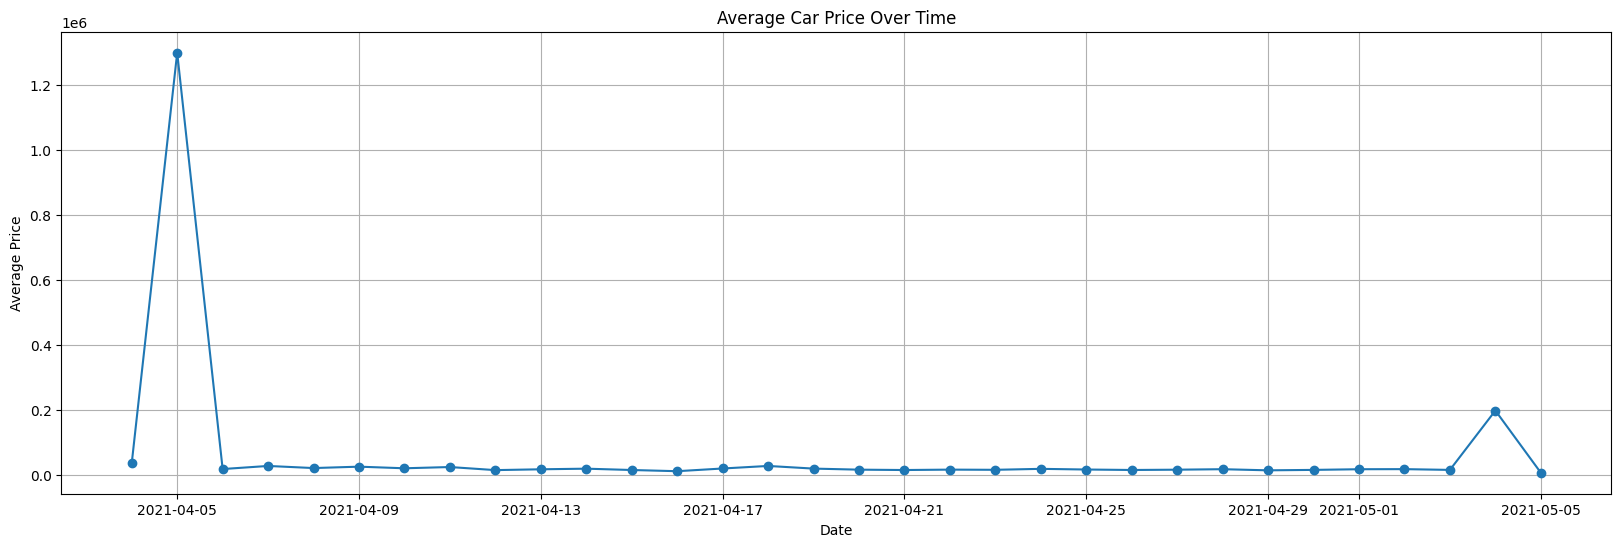

In [37]:
# @title Time-series chart

# Convert 'posting_date' to datetime
df['posting_date'] = pd.to_datetime(df['posting_date'])

# Group by 'posting_date' and calculate the average price for each day
daily_avg_price = df.groupby(['posting_date'])['price'].mean()

# Create a time-series chart
plt.figure(figsize=(20, 6))
plt.plot(daily_avg_price.index, daily_avg_price.values, marker='o', linestyle='-')
plt.title('Average Car Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)

plt.show()